# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 5
# Feature Engineering - Different Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Outlier Detection

## 1.1 IQR Method

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [3]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [4]:
## convert height in inches to cm
df.Height = [height*2.54 for height in df.Height]
df.head()

Gender      Height      Weight
0   Male  187.571423  241.893563
1   Male  174.706036  162.310473
2   Male  188.239668  212.740856
3   Male  182.196685  220.042470
4   Male  177.499761  206.349801

In [5]:
df.shape

(10000, 3)

In [6]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

## 

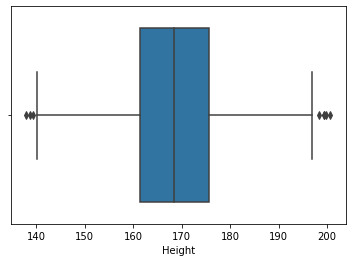

In [7]:
## ploting boxplot to check outliers
sns.boxplot(x=df['Height'])
plt.show()

In [8]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [9]:
## checking outlier
df[(df.Height < lowerlimit)  | (df.Height > upperlimit)]

Gender      Height      Weight
994     Male  198.363503  255.690835
1317    Male  199.293614  227.342565
2014    Male  200.656806  269.989699
3285    Male  199.461654  253.889004
3757    Male  199.698290  245.733783
6624  Female  138.726819   71.393749
7294  Female  139.379268   78.606670
9285  Female  137.828359   64.700127

In [10]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = df[(df.Height > lowerlimit) & (df.Height < upperlimit)]
df1.shape

(9992, 3)

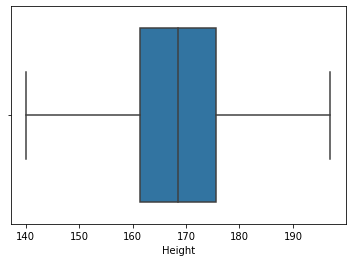

In [11]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Height'])
plt.show()

## 1.2. Standard Deviation method

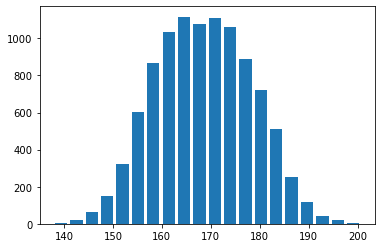

In [12]:
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.show()

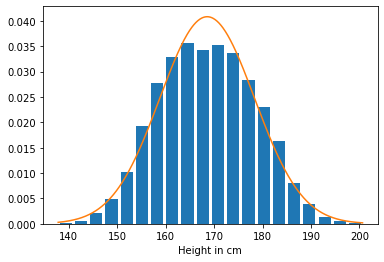

In [13]:
from scipy.stats import norm 
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height in cm')
rang = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rang, norm.pdf(rang,df.Height.mean(),df.Height.std()))
plt.show()

In [14]:
# drop outliers which falls beyond 3 standard deviation range
std = df.Height.std()
std

9.772721426763994

In [15]:
mean = df.Height.mean()
mean

168.57360177724604

In [16]:
upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)

In [17]:
df[(df.Height<lowerlimit) | (df.Height>upperlimit)]

Gender      Height      Weight
994     Male  198.363503  255.690835
1317    Male  199.293614  227.342565
2014    Male  200.656806  269.989699
3285    Male  199.461654  253.889004
3757    Male  199.698290  245.733783
6624  Female  138.726819   71.393749
9285  Female  137.828359   64.700127

In [18]:
df2 = df[(df.Height>lowerlimit) & (df.Height<upperlimit)]
df2.shape

(9993, 3)

# 2. Transformation

In [19]:
loandf = pd.read_csv("loan_train.csv")
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

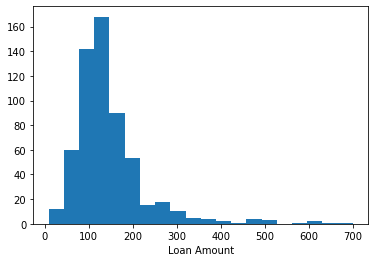

In [20]:
plt.hist(loandf.LoanAmount,bins=20)
plt.xlabel("Loan Amount")
plt.show()

## 2.1. Log Transformation

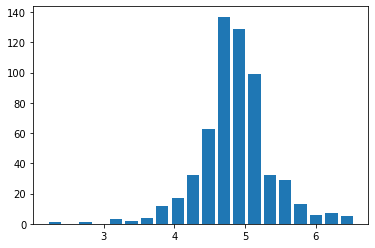

In [21]:
# Apply log transformation
x = np.log(loandf['LoanAmount'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## 2.2. Reciprocal transformation

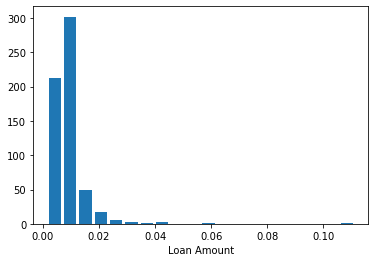

In [22]:
# x = 1/loandf.LoanAmount
x = np.reciprocal(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.3. Square root Transformation

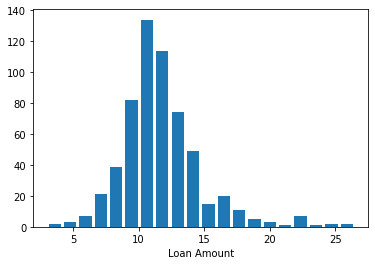

In [23]:
# x = loandf.LoanAmount ** (1/2)
x = np.sqrt(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.4. Cube root Transformation

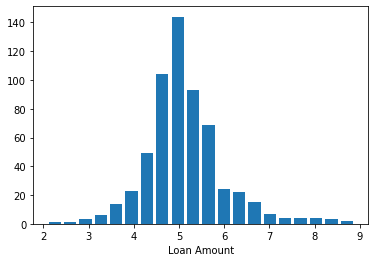

In [24]:
# x = loandf.LoanAmount ** (1/3)
x = np.cbrt(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.5 Exponential Transformation

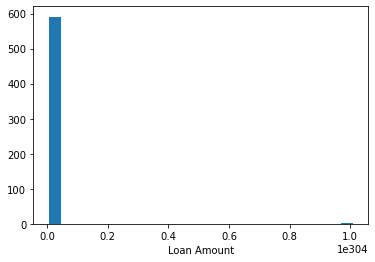

In [25]:
x = np.exp(loandf.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

# 3. Feature Scaling

## 3.1. MinMax Scaler

In [26]:
loandf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
numeric_columns = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
numericdf = loandf[numeric_columns]


In [28]:
numericdf.isna().sum()

ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [29]:
numericdf.bfill(inplace=True)

C:\Users\Kuenga\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
# Dataframe before scaling
numericdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0             5849       128.0             360.0             1.0
1             4583       128.0             360.0             1.0
2             3000        66.0             360.0             1.0
3             2583       120.0             360.0             1.0
4             6000       141.0             360.0             1.0

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [32]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.070489    0.172214           0.74359             1.0
1         0.054830    0.172214           0.74359             1.0
2         0.035250    0.082489           0.74359             1.0
3         0.030093    0.160637           0.74359             1.0
4         0.072356    0.191027           0.74359             1.0

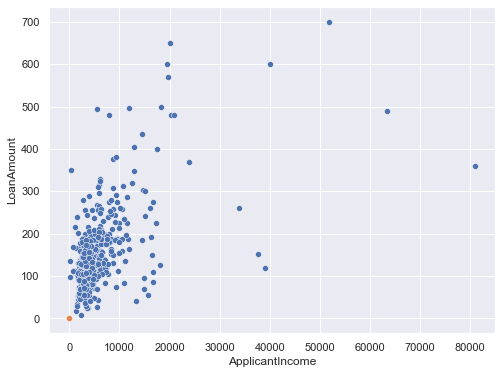

In [33]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=loandf,x='ApplicantIncome',y='LoanAmount')
sns.scatterplot(data = transformdf,x='ApplicantIncome',y='LoanAmount')
plt.show()

## 3.2. Standard Scaler

`class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)`

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(numericdf)

In [35]:
standardf = pd.DataFrame(numeric,columns=numeric_columns)
standardf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.072991   -0.217057          0.273231        0.433152
1        -0.134412   -0.217057          0.273231        0.433152
2        -0.393747   -0.947774          0.273231        0.433152
3        -0.462062   -0.311343          0.273231        0.433152
4         0.097728   -0.063843          0.273231        0.433152

## 3.3. Robust Scaler


In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(numericdf)

In [37]:
robustdf = pd.DataFrame(numeric,columns=numeric_columns)
robustdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.698029    0.000000               0.0             0.0
1         0.264096    0.000000               0.0             0.0
2        -0.278492   -0.928839               0.0             0.0
3        -0.421422   -0.119850               0.0             0.0
4         0.749786    0.194757               0.0             0.0

# 4. Encoding Categorical variables

In [38]:
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## 4.1. One-Hot Encoding using Pandas get_dummies()

In [39]:
loandf.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [40]:
categorical_columns=["Gender",'Married']
cdf = loandf[categorical_columns]
cdf.head()

Gender Married
0   Male      No
1   Male     Yes
2   Male     Yes
3   Male     Yes
4   Male      No

In [41]:
#creating dummy variables for nominal categorical variable using get_dummies()
categorical_columns=["Gender",'Married']
cdf = loandf[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head()

Gender_Female  Gender_Male  Married_No  Married_Yes
0              0            1           1            0
1              0            1           0            1
2              0            1           0            1
3              0            1           0            1
4              0            1           1            0

## 4.2. One-Hot Encoding 

In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical = ohe.fit_transform(loandf[['Education']]).toarray()
categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## 4.3. Ordinal Encoder (Ordinal data)

In [43]:
ndf = pd.read_csv("HR_comma_sep.csv")
ndf.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [44]:
from sklearn.preprocessing import OrdinalEncoder
oe =  OrdinalEncoder()
ndf['salary'] = oe.fit_transform(ndf[['salary']])
ndf.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     1.0  
1     2.0  
2     2.0  
3     1.0  
4     1.0

## 4.4. Label Encoder

In [45]:
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [46]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
loandf['Loan_Status'] = le.fit_transform(loandf.Loan_Status)
loandf.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1

# 5. Feature Selection

## 5.1. Correlation based (Multicoliinearity)

In [47]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [48]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [49]:
bdf = pd.DataFrame(data=boston.data,columns=boston.feature_names)
bdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

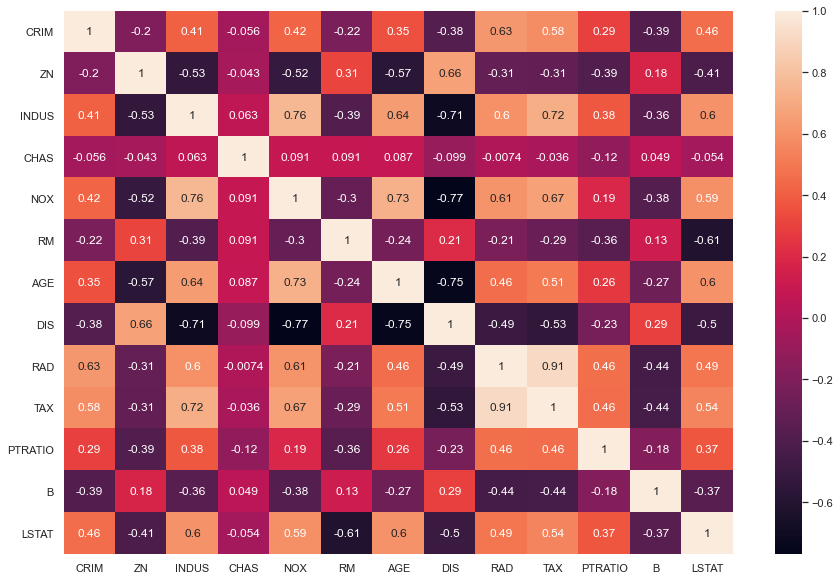

In [50]:
corr = bdf.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [51]:
corr.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [52]:
def correlation_matrix(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation_matrix(bdf,0.7)
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [54]:
newdf = bdf.drop(corr_features,axis = 1)
newdf.head()

CRIM    ZN  INDUS  CHAS     RM  RAD  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  6.575  1.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  6.421  2.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  7.185  2.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  6.998  3.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  7.147  3.0     18.7  396.90   5.33

## 5.2 Univariate feature selection using SelectKBest 

### 5.2.1. Pearson's Correlation Coefficient

Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.
`class sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10)`

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
fs = SelectKBest(score_func=f_regression,k=10)

#apply feature selection
X_selected = fs.fit_transform(bdf,boston.target)

In [56]:
X_selected.shape

(506, 10)

### 5.2.2. ANOVA F Measure

In [57]:
iris = datasets.load_iris()
idf = pd.DataFrame(data=iris.data,columns=iris.feature_names)
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [58]:
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif,k=3)
X_selected = fs.fit_transform(idf,iris.target)
X_selected.shape

(150, 3)

### 5.2.3. Chi-squared test to select K Best features

In [59]:
from sklearn.feature_selection import chi2
# Create features and target
X = iris.data
y = iris.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)

fs = SelectKBest(score_func=chi2,k=4)
X_selected = fs.fit_transform(X,y)
X_selected.shape

(150, 4)

# HomeWork (TODO 5)

Apply different feature engineering techniques covered today to loan prediction problem and train your model again.

 # 1. Outlier Detection
 ## 1.1 IQR Method

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [61]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [62]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [63]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [64]:
train.shape

(614, 13)

In [65]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

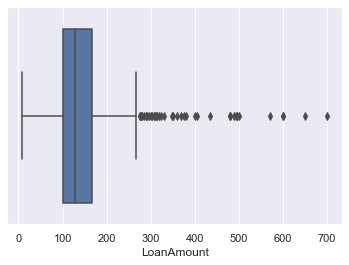

In [66]:
## ploting boxplot to check outliers
sns.boxplot(x=train['LoanAmount'])
plt.show()

The above graph's distribution is skewed and we can notice quite a few outliers.

In [67]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [68]:
## checking outlier
train[(train.LoanAmount < lowerlimit)  | (train.LoanAmount > upperlimit)]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
5               5417             4196.0       267.0             360.0   
6               2333             1516.0        95.0             360.0   
..               ...                ...         ...               ...   
608             3232             1950.0       108.0             360.0   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
5               1.0         Urban           Y  
6               1.0         Urban           Y  
..              ...           ...         ...  
608             1.0         Rural           Y  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
613             0.0     Semiurban           N  

[449 rows x 13 columns]

In [69]:
## Drop all the rows containing height beyond lower and upper limit.
traindf = train[(train.LoanAmount > lowerlimit) & (train.LoanAmount < upperlimit)]
traindf.shape

(143, 13)

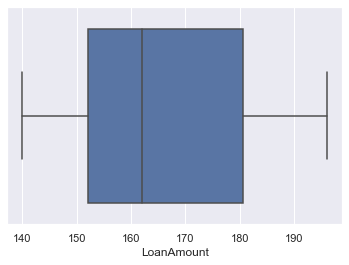

In [70]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=traindf['LoanAmount'])
plt.show()

 # 1.2. Standard Deviation method

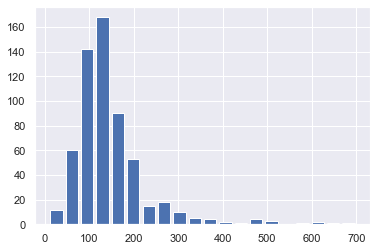

In [71]:
plt.hist(train.LoanAmount,bins=20,rwidth=0.8)
plt.show()

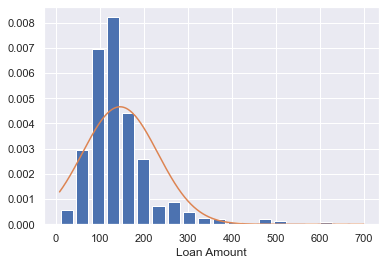

In [72]:
from scipy.stats import norm 
plt.hist(train.LoanAmount,bins=20,rwidth=0.8,density=True)
plt.xlabel('Loan Amount')
rang = np.arange(train.LoanAmount.min(),train.LoanAmount.max(),0.1)
plt.plot(rang, norm.pdf(rang,train.LoanAmount.mean(),train.LoanAmount.std()))
plt.show()

In [73]:
# drop outliers which falls beyond 3 standard deviation range
std = train.LoanAmount.std()
std

85.58732523570545

In [74]:
mean = train.LoanAmount.mean()
mean

146.41216216216216

In [75]:
upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)

In [76]:
train[(train.LoanAmount<lowerlimit) | (train.LoanAmount>upperlimit)]

Loan_ID  Gender Married Dependents Education Self_Employed  \
130  LP001469    Male      No          0  Graduate           Yes   
155  LP001536    Male     Yes         3+  Graduate            No   
171  LP001585     NaN     Yes         3+  Graduate            No   
177  LP001610    Male     Yes         3+  Graduate            No   
278  LP001907    Male     Yes          0  Graduate            No   
308  LP001996    Male      No          0  Graduate            No   
333  LP002101    Male     Yes          0  Graduate           NaN   
369  LP002191    Male     Yes          0  Graduate            No   
432  LP002386    Male      No          0  Graduate           NaN   
487  LP002547    Male     Yes          1  Graduate            No   
506  LP002624    Male     Yes          0  Graduate            No   
523  LP002693    Male     Yes          2  Graduate           Yes   
561  LP002813  Female     Yes          1  Graduate           Yes   
604  LP002959  Female     Yes          1  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
130            20166                0.0       650.0             480.0   
155            39999                0.0       600.0             180.0   
171            51763                0.0       700.0             300.0   
177             5516            11300.0       495.0             360.0   
278            14583                0.0       436.0             360.0   
308            20233                0.0       480.0             360.0   
333            63337                0.0       490.0             180.0   
369            19730             5266.0       570.0             360.0   
432            12876                0.0       405.0             360.0   
487            18333                0.0       500.0             360.0   
506            20833             6667.0       480.0             360.0   
523             7948             7166.0       480.0             360.0   
561            19484                0.0       600.0             360.0   
604            12000                0.0       496.0             360.0   

     Credit_History Property_Area Loan_Status  
130             NaN         Urban           Y  
155             0.0     Semiurban           Y  
171             1.0         Urban           Y  
177             0.0     Semiurban           N  
278             1.0     Semiurban           Y  
308             1.0         Rural           N  
333             1.0         Urban           Y  
369             1.0         Rural           N  
432             1.0     Semiurban           Y  
487             1.0         Urban           N  
506             NaN         Urban           Y  
523             1.0         Rural           Y  
561             1.0     Semiurban           Y  
604             1.0     Semiurban           Y

In [77]:
traindf2 = train[(train.LoanAmount>lowerlimit) & (train.LoanAmount<upperlimit)]
traindf2.shape

(578, 13)

# 2. Transformation

In [78]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

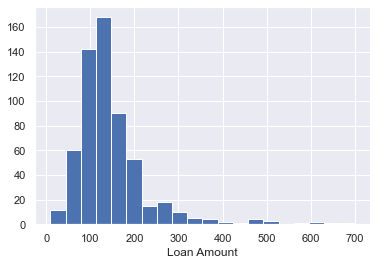

In [79]:
plt.hist(train.LoanAmount,bins=20)
plt.xlabel("Loan Amount")
plt.show()

## 2.1. Log Transformation

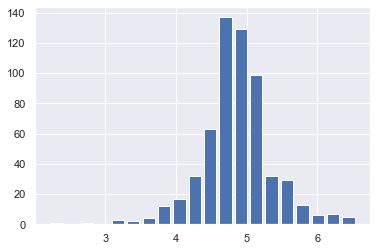

In [80]:
# Apply log transformation
x = np.log(train['LoanAmount'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## 2.2. Reciprocal transformation

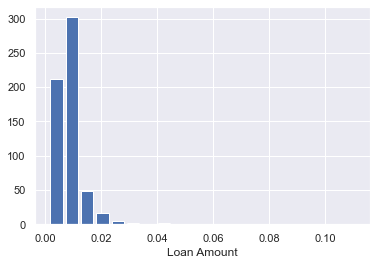

In [81]:
# x = 1/train.LoanAmount
x = np.reciprocal(train.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.3. Square root Transformation

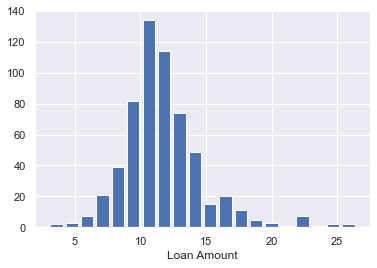

In [82]:
# x = train.LoanAmount ** (1/2)
x = np.sqrt(train.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.4. Cube root Transformation

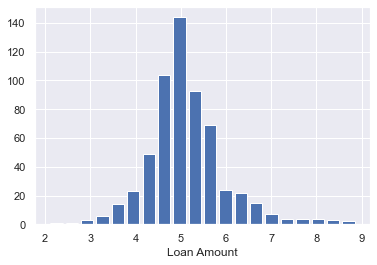

In [83]:
# x = train.LoanAmount ** (1/3)
x = np.cbrt(train.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

## 2.5 Exponential Transformation

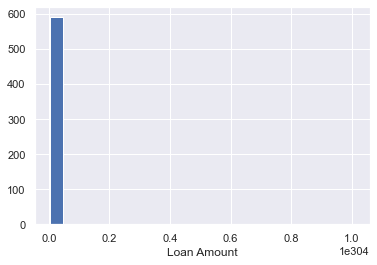

In [84]:
x = np.exp(train.LoanAmount)
plt.hist(x,bins=20,rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

# 3. Feature Scaling

In [85]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [86]:
numeric_columns = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
numericdf = loandf[numeric_columns]
numericdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0             5849         NaN             360.0             1.0
1             4583       128.0             360.0             1.0
2             3000        66.0             360.0             1.0
3             2583       120.0             360.0             1.0
4             6000       141.0             360.0             1.0

In [87]:
numericdf.isna().sum()

ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [88]:
numericdf.bfill(inplace=True)

C:\Users\Kuenga\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [89]:
# Dataframe before scaling
numericdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0             5849       128.0             360.0             1.0
1             4583       128.0             360.0             1.0
2             3000        66.0             360.0             1.0
3             2583       120.0             360.0             1.0
4             6000       141.0             360.0             1.0

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)
numeric

array([[0.07048856, 0.17221418, 0.74358974, 1.        ],
       [0.05482993, 0.17221418, 0.74358974, 1.        ],
       [0.03525046, 0.08248915, 0.74358974, 1.        ],
       ...,
       [0.09798392, 0.35311143, 0.74358974, 1.        ],
       [0.09193568, 0.25759768, 0.74358974, 1.        ],
       [0.05482993, 0.17945007, 0.74358974, 0.        ]])

In [91]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.070489    0.172214           0.74359             1.0
1         0.054830    0.172214           0.74359             1.0
2         0.035250    0.082489           0.74359             1.0
3         0.030093    0.160637           0.74359             1.0
4         0.072356    0.191027           0.74359             1.0

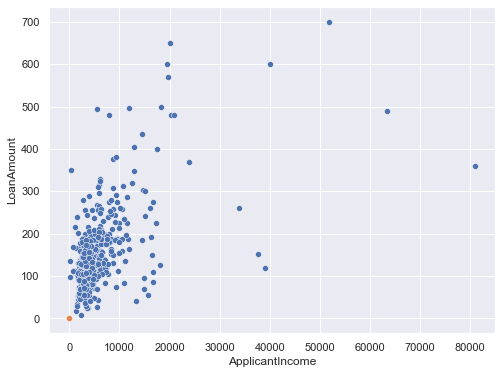

In [92]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=loandf,x='ApplicantIncome',y='LoanAmount')
sns.scatterplot(data = transformdf,x='ApplicantIncome',y='LoanAmount')
plt.show()

## 3.2. Standard Scaler

`class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)`

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(numericdf)
numeric

array([[ 0.07299082, -0.21705745,  0.2732313 ,  0.43315227],
       [-0.13441195, -0.21705745,  0.2732313 ,  0.43315227],
       [-0.39374734, -0.94777402,  0.2732313 ,  0.43315227],
       ...,
       [ 0.43717437,  1.25616145,  0.2732313 ,  0.43315227],
       [ 0.35706382,  0.47830187,  0.2732313 ,  0.43315227],
       [-0.13441195, -0.15812869,  0.2732313 , -2.30865695]])

In [94]:
standardf = pd.DataFrame(numeric,columns=numeric_columns)
standardf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.072991   -0.217057          0.273231        0.433152
1        -0.134412   -0.217057          0.273231        0.433152
2        -0.393747   -0.947774          0.273231        0.433152
3        -0.462062   -0.311343          0.273231        0.433152
4         0.097728   -0.063843          0.273231        0.433152

## 3.3. Robust Scaler

In [95]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(numericdf)
numeric

array([[ 0.69802913,  0.        ,  0.        ,  0.        ],
       [ 0.26409597,  0.        ,  0.        ,  0.        ],
       [-0.27849186, -0.92883895,  0.        ,  0.        ],
       ...,
       [ 1.45998286,  1.87265918,  0.        ,  0.        ],
       [ 1.29237361,  0.88389513,  0.        ,  0.        ],
       [ 0.26409597,  0.07490637,  0.        , -1.        ]])

In [96]:
robustdf = pd.DataFrame(numeric,columns=numeric_columns)
robustdf.head()

ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
0         0.698029    0.000000               0.0             0.0
1         0.264096    0.000000               0.0             0.0
2        -0.278492   -0.928839               0.0             0.0
3        -0.421422   -0.119850               0.0             0.0
4         0.749786    0.194757               0.0             0.0

# 4. Encoding Categorical variables

In [97]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

## 4.1. One-Hot Encoding using Pandas get_dummies()

In [98]:
train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [99]:
categorical_columns=["Gender",'Married']
cdf = train[categorical_columns]
cdf.head()

Gender Married
0   Male      No
1   Male     Yes
2   Male     Yes
3   Male     Yes
4   Male      No

In [100]:
#creating dummy variables for nominal categorical variable using get_dummies()
categorical_columns=["Gender",'Married']
cdf = train[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head()

Gender_Female  Gender_Male  Married_No  Married_Yes
0              0            1           1            0
1              0            1           0            1
2              0            1           0            1
3              0            1           0            1
4              0            1           1            0

## 4.2. One-Hot Encoding 

In [101]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical = ohe.fit_transform(train[['Education']]).toarray()
categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## 4.3. Ordinal Encoder (Ordinal data)

In [102]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [103]:
from sklearn.preprocessing import OrdinalEncoder
oe =  OrdinalEncoder()
train['Property_Area'] = oe.fit_transform(train[['Property_Area']])
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  
0             1.0            2.0           Y  
1             1.0            0.0           N  
2             1.0            2.0           Y  
3             1.0            2.0           Y  
4             1.0            2.0           Y

## 4.4. Label Encoder

In [104]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  
0             1.0            2.0           Y  
1             1.0            0.0           N  
2             1.0            2.0           Y  
3             1.0            2.0           Y  
4             1.0            2.0           Y

In [105]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
train['Loan_Status'] = le.fit_transform(train.Loan_Status)
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0            2.0            1  
1             1.0            0.0            0  
2             1.0            2.0            1  
3             1.0            2.0            1  
4             1.0            2.0            1

In [106]:
## Applying Log to the Price to normalise it
train.LoanAmount = np.log1p(train.LoanAmount)

In [107]:
## Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [108]:
train['Loan_ID'] = label_encoder.fit_transform(train['Loan_ID'])
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Married'] = label_encoder.fit_transform(train['Married'])
train['Education'] = label_encoder.fit_transform(train['Education'])
train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])
train['Dependents'] = label_encoder.fit_transform(train['Dependents'])
train.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0    4.859812             360.0   
2             3000                0.0    4.204693             360.0   
3             2583             2358.0    4.795791             360.0   
4             6000                0.0    4.955827             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0            2.0            1  
1             1.0            0.0            0  
2             1.0            2.0            1  
3             1.0            2.0            1  
4             1.0            2.0            1

In [109]:
train.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int32
dtype: object

In [110]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
train[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] = imputer.fit_transform(train[["LoanAmount", "Loan_Amount_Term", "Credit_History"]])

In [112]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 5. Feature Selection

## 5.1. Correlation based (Multicoliinearity)

In [113]:
train.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
train.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0    4.866325             360.0   
1             4583             1508.0    4.859812             360.0   
2             3000                0.0    4.204693             360.0   
3             2583             2358.0    4.795791             360.0   
4             6000                0.0    4.955827             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0            2.0            1  
1             1.0            0.0            0  
2             1.0            2.0            1  
3             1.0            2.0            1  
4             1.0            2.0            1

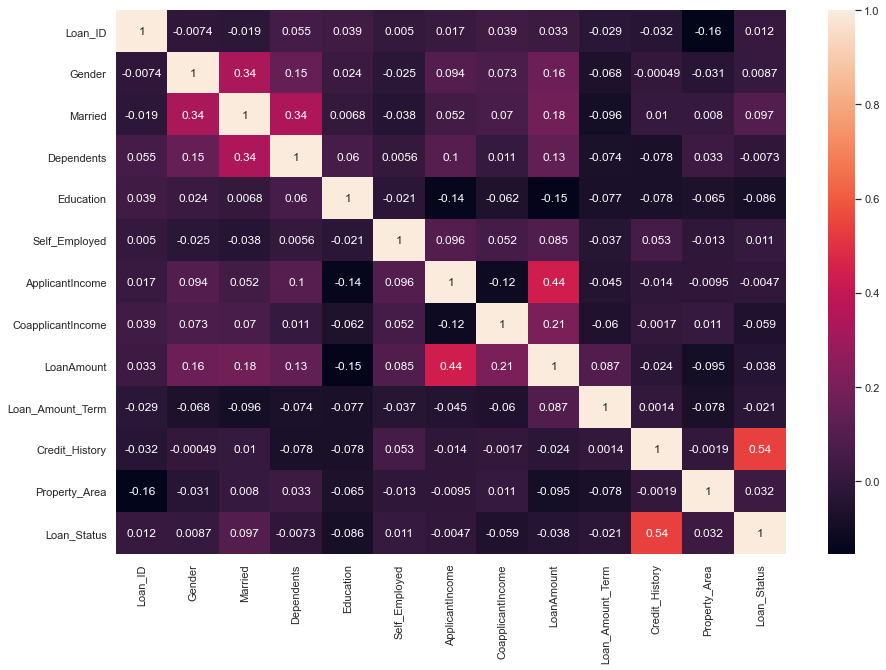

In [115]:
corr = train.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

In [116]:
corr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [117]:
def correlation_matrix(train,threshold):
    col_corr = set()
    corr_matrix = train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [118]:
corr_features = correlation_matrix(train,0.4)
corr_features

{'LoanAmount', 'Loan_Status'}

In [119]:
newdf = train.drop(corr_features,axis = 1)
newdf.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0             5849                0.0             360.0             1.0   
1             4583             1508.0             360.0             1.0   
2             3000                0.0             360.0             1.0   
3             2583             2358.0             360.0             1.0   
4             6000                0.0             360.0             1.0   

   Property_Area  
0            2.0  
1            0.0  
2            2.0  
3            2.0  
4            2.0

## 5.2 Univariate feature selection using SelectKBest 

### 5.2.1. Pearson's Correlation Coefficient

Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.
`class sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, *, k=10)`

In [120]:
train.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0    4.866325             360.0   
1             4583             1508.0    4.859812             360.0   
2             3000                0.0    4.204693             360.0   
3             2583             2358.0    4.795791             360.0   
4             6000                0.0    4.955827             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0            2.0            1  
1             1.0            0.0            0  
2             1.0            2.0            1  
3             1.0            2.0            1  
4             1.0            2.0            1

In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#define feature selection
fs = SelectKBest(score_func=f_regression,k=10)

#apply feature selection
X_selected = fs.fit_transform(train,train.LoanAmount)

In [122]:
X_selected.shape

(614, 10)

### 5.2.2. ANOVA F Measure

In [123]:
train.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0    4.866325             360.0   
1             4583             1508.0    4.859812             360.0   
2             3000                0.0    4.204693             360.0   
3             2583             2358.0    4.795791             360.0   
4             6000                0.0    4.955827             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0            2.0            1  
1             1.0            0.0            0  
2             1.0            2.0            1  
3             1.0            2.0            1  
4             1.0            2.0            1

In [124]:
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif,k=3)
X_selected = fs.fit_transform(train,train.LoanAmount)
X_selected.shape

C:\Users\Kuenga\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(614, 3)

In [125]:
X_selected

array([[5.84900000e+03, 0.00000000e+00, 4.86632457e+00],
       [4.58300000e+03, 1.50800000e+03, 4.85981240e+00],
       [3.00000000e+03, 0.00000000e+00, 4.20469262e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 5.53733427e+00],
       [7.58300000e+03, 0.00000000e+00, 5.23644196e+00],
       [4.58300000e+03, 0.00000000e+00, 4.89783980e+00]])

# 6. Training Model

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([-0.03383673,  0.00895669,  1.64397397,  1.86883241,  0.00895669,
        1.2646441 , -0.03383673,  1.2646441 , -0.03383673,  1.86883241,
        1.24864085,  1.61718381, -0.03383673, -0.03383673,  1.57508937,
        2.22137212,  1.29143426,  1.86883241,  1.30743751,  1.826039  ,
        1.60118056,  1.2646441 , -0.03383673,  0.00895669, -0.03383673,
        0.02495994,  0.00895669,  0.00895669, -0.03383673,  1.2646441 ])

In [128]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 0.15326447988165037
Mean Squared Error: 0.04251317134263513
Root Mean Squared Error: 0.2061872240043867
R2 score : 0.942463


In [129]:
from sklearn.linear_model import Lasso

modelL = Lasso(alpha=1.0)
modelL.fit(X_train,y_train)

Lasso()

In [130]:
modelL.score(X_train,y_train)

0.36924578387715035

In [131]:
modelL.score(X_valid,y_valid)

0.3396216208476095

In [132]:
Y_train_predicted = model1.predict(X_train)
Y_test_predicted = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.9000440098935296
Test set accuracy :  0.9424633771302682


In [133]:
Result = pd.DataFrame({"Actual Loan Amount":y_valid,"Predicted Loan Amount":Y_test_predicted})
Result.head(10)

Actual Loan Amount  Predicted Loan Amount
0                   0              -0.033837
1                   0               0.008957
2                   2               1.643974
3                   2               1.868832
4                   0               0.008957
5                   1               1.264644
6                   0              -0.033837
7                   1               1.264644
8                   0              -0.033837
9                   2               1.868832